# Breast Cancer Detection

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

The DataFrame diagnosis contains measurements computed from digitized images of breast masses. The response variable is named "diagnosis" and contains the diagnosis of each mass as benign (B) or malignant (M).

In [2]:
diagnosis = pd.read_csv("./data/breastCancerData.csv", dtype={'diagnosis': 'category'})
diagnosis.head()

,diagnosis,radiusMean,radiusStandardError,radiusMax,textureMean,textureStandardError,textureMax,perimeterMean,perimeterStandardError,perimeterMax,...,concavityMax,concavePointsMean,concavePointsStandardError,concavePointsMax,symmetryMean,symmetryStandardError,symmetryMax,fractalDimensionMean,fractalDimensionStandardError,fractalDimensionMax
0,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.57,17.77,132.90,1326.0,0.0847,0.0786,0.0869,0.0702,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,M,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


Partition the data into training and test sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diagnosis.iloc[:, 1:], diagnosis.iloc[:, 0], test_size=0.3, random_state=0)

Fit classifier and calculate accuracy.

In [4]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
print("Accuracy:", classifier.score(X_test, y_test))

Accuracy: 0.9473684210526315


False negatives are masses where the true diagnosis is malignant, but the predicted diagnosis is benign. The false negative rate is different from the misclassification rate, which includes benign masses that are misclassified as malignant.

In [5]:
predictions = classifier.predict(X_test)
false_negative = ((y_test == "M") & (predictions == "B")).mean()
print("False negative:", false_negative)

False negative: 0.023391812865497075


<Figure size 640x480 with 0 Axes>

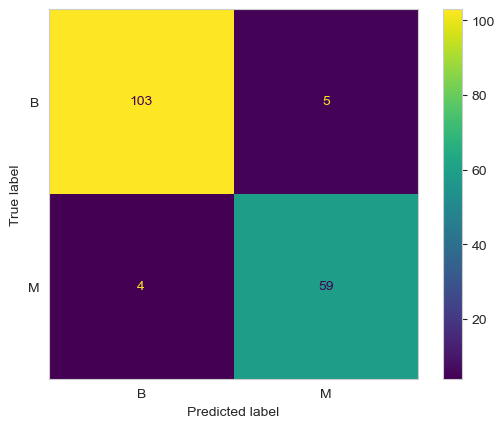

In [6]:
cm = confusion_matrix(y_test, classifier.predict(X_test), labels=classifier.classes_)

plt.figure()
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot();
plt.grid(visible=False)
plt.show()